# Kp - Ap - индексы геомагнитной активности

In [73]:
import pandas as pd
import numpy
import math

In [74]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [75]:
kp_index = pd.read_table('kp.txt', parse_dates=True,skiprows=1,sep=r'\s*')

In [76]:
# значение Kp - в баллах (символьная переменная) - трехчасовой индекс, Ap - в наноТеслах (число)
kp_index.head()

,20121201,1,1.1,0+,0+.1,1-,1-.1,2+,2+.1,9-,4,4.1,2,2.1,3,3.1,9,9.1,4.2
0,20121202,3-,3-,3-,3-,2,1-,0+,0,14-,12,12,12,12,7,3,2,0,8
1,20121203,0+,1,1+,1-,1,1,1-,1+,7+,2,4,5,3,4,4,3,5,4
2,20121204,1+,3-,2,0+,0+,0,0+,0,7,5,12,7,2,2,0,2,0,4
3,20121205,0,0,0,0+,0,0,1-,1+,2+,0,0,0,2,0,0,3,5,1
4,20121206,0,0,0,0+,0+,0,0,0,1-,0,0,0,2,2,0,0,0,0


In [77]:
# переименуем столбцы
kp=kp_index.rename(columns={'20121201':'Date','1':'Kp_1','1.1':'Kp_2','0+':'Kp_3','0+.1':'Kp_4','1-':'Kp_5','1-.1':'Kp_6','2+':'Kp_7','2+.1':'Kp_8','9-':'SumKp','4':'ap_1','4.1':'ap_2','2':'ap_3','2.1':'ap_4','3':'ap_5','3.1':'ap_6','9':'ap_7','9.1':'ap_8','4.2':'Av_ap'})

In [78]:
kp.head()

,Date,Kp_1,Kp_2,Kp_3,Kp_4,Kp_5,Kp_6,Kp_7,Kp_8,SumKp,ap_1,ap_2,ap_3,ap_4,ap_5,ap_6,ap_7,ap_8,Av_ap
0,20121202,3-,3-,3-,3-,2,1-,0+,0,14-,12,12,12,12,7,3,2,0,8
1,20121203,0+,1,1+,1-,1,1,1-,1+,7+,2,4,5,3,4,4,3,5,4
2,20121204,1+,3-,2,0+,0+,0,0+,0,7,5,12,7,2,2,0,2,0,4
3,20121205,0,0,0,0+,0,0,1-,1+,2+,0,0,0,2,0,0,3,5,1
4,20121206,0,0,0,0+,0+,0,0,0,1-,0,0,0,2,2,0,0,0,0


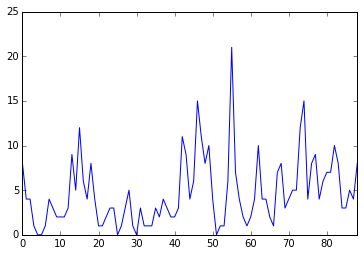

In [79]:
# строим среднесуточное значенеие
kp['Av_ap'].plot()

In [80]:
# создаем massiv Apdaily размерности N
N=kp.shape[0]
N
t=zeros(N)
Ap=zeros(N)
Ap=kp['Av_ap']
M=N/2

A=zeros(N)
B=zeros(N)
A[0]=Ap.mean()
B[0]=0.
A[0]

4.7191011235955056

In [81]:
# интервал в сутках
dt=1.
t=arange(N)

In [82]:
# периоды для Фурье разложения
T=zeros(N)
# частоты
w=zeros(N)
dw=2.*pi/(T)
for k in range(1,N):
    sumA=0.
    sumB=0.
    T[k]=T[k-1]+dt
    for i in range(0,N):
        sumA=sumA+Ap[i]*cos(2.*pi/T[k]*t[i])
        sumB=sumB+Ap[i]*sin(2.*pi/T[k]*t[i])
    A[k]=2./N*sumA
    B[k]=2./N*sumB

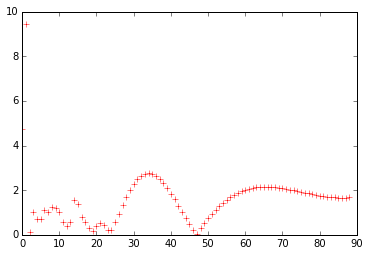

In [83]:
#plot(T[1:M],sqrt(B[1:M]**2+A[1:M]**2),'r+')
plot(T,sqrt(B**2+A**2),'r+')

# Fust Furie transform

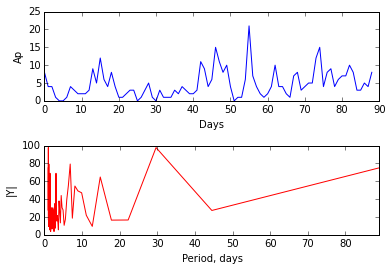

In [84]:
frq=arange(N)
#print float(N)/frq
Y = fft.fft(Ap) # fft computing and normalization

Y = Y[range(N)]
#print Y
figure(1, figsize=(6,6))
fig,ax = plt.subplots(2, 1)
ax[0].plot(t,Ap)
ax[0].set_xlabel('Days')
ax[0].set_ylabel('Ap')
fig.subplots_adjust(hspace=0.5)
ax[1].plot(float(N)/frq[1:N],abs(Y[1:N]),'r') # plotting the spectrum
ax[1].set_xlim([0,N])
ax[1].set_xlabel('Period, days')
ax[1].set_ylabel('|Y|')
savefig('same_size.png', dpi=600)
show()

### Обратите внимание на различие в спектре, полученном "вручную" и fft

In [85]:
# попробуем внести небольшие изменение в код:
Ap=kp['Av_ap']-kp['Av_ap'].mean() # данные теперь варьируются около нуля 
# посмотрим, как это отразиться на вычисление спектра
A[0]=Ap.mean()
B[0]=0.
A[0]

-1.1975439366743261e-15

In [86]:
for k in range(1,N):
    sumA=0.
    sumB=0.
    T[k]=T[k-1]+dt
    for i in range(0,N):
        sumA=sumA+Ap[i]*cos(2.*pi/T[k]*t[i])
        sumB=sumB+Ap[i]*sin(2.*pi/T[k]*t[i])
    A[k]=2./N*sumA
    B[k]=2./N*sumB

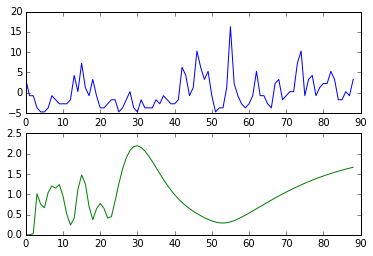

In [87]:
subplot(2, 1,1)
plot(T,Ap)
subplot(2, 1,2)
plot(T,sqrt(B**2+A**2),'g')

Обратите на внимание на рост низкочастотных (с большим периодом) колебаний. Это следствие небольшого роста Ар после 50-го дня